In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

# Display all graphics in hte notebook
%matplotlib inline

In [2]:
# NN Testing
# data_file = open('mnist/mnist_train_100.csv', 'r')
data_file = open('mnist/mnist_train.csv', 'r')
data_list = data_file.readlines()
data_file.close()

In [3]:
# Presentstion of pictunre in pixels
print(data_list[0])

5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

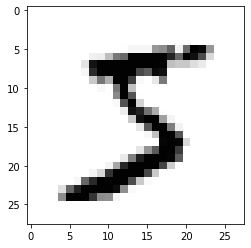

In [4]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [5]:
# Prepare pixels to range between 0.01 and 1.0
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# Print first 10 elements
print(scaled_input[:9])

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [6]:
class NeuralNetwork:
    
    # NN initialization
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.learning_rate = learning_rate
        
        # Initialization of matrices
        # wih - Matrix of input and hidden layers
        # wih - Matrix of hidden and output layers
        # w_i_j - connection between input layer - i and hidden layer - j
        # self.wih = np.random.rand(hidden_nodes, input_nodes) - 0.5 # [-0.5; +0.5]
        # self.who = np.random.rand(output_nodes, hidden_nodes) - 0.5 # [-0.5; +0.5]
        
        # Other way to initialize matrices
        # 0.0 - center of normal distribution
        self.wih = np.random.normal(0.0, pow(hidden_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.who = np.random.normal(0.0, pow(output_nodes, -0.5), (self.output_nodes, self.hidden_nodes))
        
        # Activation function - sigmoid
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # Training of neural network
    def train(self, inputs_list, targets_list):
        # Calculate input signals
        
        # Create 2d array from inputs
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # Calculate input signals for the hidden layer
        hidden_inputs = np.matmul(self.wih, inputs)
        
        # Calculate output signals for hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate input signals for output layer
        final_inputs = np.matmul(self.who, hidden_outputs)
        
        # Calculate output signals for output layer
        final_outputs = self.activation_function(final_inputs)
        
        #         print(inputs, targets)
        #         print(hidden_inputs, '\n', hidden_outputs, '\n', final_inputs, '\n', final_outputs, '\n')
        
        # Calculate ERRORS
        output_errors = targets - final_outputs
        
        # Calculate backpropagation
        hidden_errors = np.matmul(self.who.T, output_errors)
        
        # Update linked coefficients between hidden and ouput layer
        self.who += self.learning_rate * np.matmul((output_errors * final_outputs * 
                                            (1.0 - final_outputs)), np.transpose(hidden_outputs))
        # Update linked coefficients between input and hidden layer
        self.wih += self.learning_rate * np.matmul((hidden_errors * hidden_outputs * 
                                    (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    # Quering NN
    def query(self, inputs_list):
        # List of input values into 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # Calculate input signals for hidden layer
        # Multiplying of matrices X(hidden) = W(input_hidden) * I
        hidden_inputs = np.matmul(self.wih, inputs)
              
        # Calculate output signals for hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate input signals for output layer
        final_inputs = np.matmul(self.who, hidden_outputs)
        
        # Calculate output signals for output layer
        final_outputs = self.activation_function(final_inputs)
        
        #         print(inputs)
        #         print(hidden_inputs, '\n', hidden_outputs, '\n', final_inputs, '\n', final_outputs, '\n')
    
        return final_outputs
    
    # print matrices
    def print_matrices(self):
        print('-' * 20, 'input--hidden', '\n', self.wih)
        print('-' * 20, 'hidden--output', '\n', self.who)
        pass

In [7]:
# Data preparing
data_file = open('mnist/mnist_train.csv', 'r') # r - readonly
data_list = data_file.readlines()
data_file.close()

In [8]:
input_nodes = 784  # 28x28 pixels
hidden_nodes = 100 # random value
output_nodes = 10  # range 0-9
learning_rate = 0.3

targets = np.zeros(output_nodes) + 0.01
targets[int(all_values[0])] = 0.99

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [9]:
# nn.print_matrices()

In [10]:
score_card = []

In [11]:
epoch = 5

for e in range(epoch):
    for record in data_list:
        all_values = record.split(',')

        # Scale and shift data
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create all values - 0.01
        # target - 0.99    targests = numpy.zeros(output_nodes) + 0.01
        targets = np.zeros(output_nodes) + 0.01

        # All values[0] - target value
        targets[int(all_values[0])] = 0.99
        nn.train(inputs, targets)

        pass
    pass

In [12]:
# Test

# test_data_file = open('mnist/mnist_test_10.csv', 'r')
test_data_file = open('mnist/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [13]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


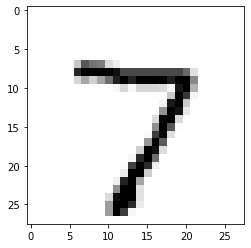

In [14]:
image_array = np.asfarray(all_values[1:]).reshape(28,28)
plt.imshow(image_array, cmap='Greys')

In [15]:
# Show index of value index 7 equal to 7
nn.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[4.77266334e-04],
       [1.94764756e-03],
       [4.73438345e-03],
       [8.90486373e-04],
       [1.95330660e-03],
       [6.32424732e-04],
       [2.00947211e-03],
       [9.99205423e-01],
       [2.03046864e-02],
       [2.59703860e-04]])

In [16]:
score_card = []

In [17]:
for record in test_data_list:
    all_values = record.split(',')
    
    correct_label = int(all_values[0])
#     print('Correct label', correct_label)
    
    # Scale and shift data
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # create all values - 0.01
    # target - 0.99    targests = numpy.zeros(output_nodes) + 0.01
    outputs = nn.query(inputs)
    
    label = np.argmax(outputs)
#     print('NN response', label)

    targets = np.zeros(output_nodes) + 0.01
    
    targets[int(all_values[0])] = 0.99
    nn.train(inputs, targets)
    
    if (label == correct_label):
        score_card.append(1)
    else:
        score_card.append(0)
        pass
    
    pass

In [18]:
score_card_array = np.asarray(score_card)
print('Accuracy ', score_card_array.sum() / score_card_array.size)

Accuracy  0.9552
